<div style="text-align: center; font-weight: bold; font-size: 24px; color: teal;">
  Smart Premium Predictor - ML Model
</div>

## Data analysis phase of Insurance premium data set

### Initial view of the data set

In [125]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, mean_absolute_error

warnings.simplefilter("ignore")

df = pd.read_csv('./insurancepremium/train.csv')
df

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,21:39.1,Poor,No,Weekly,House,2869
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,21:39.1,Average,Yes,Monthly,House,1483
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,21:39.2,Good,Yes,Weekly,House,567
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,21:39.2,Poor,Yes,Daily,Apartment,765
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,21:39.3,Poor,Yes,Weekly,House,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,18.0,Male,39766.0,Divorced,0.0,PhD,NaN,16.939866,Rural,...,NaN,11.0,739.0,9.0,21:39.2,Average,Yes,Monthly,House,684
1048571,1048571,62.0,Female,44715.0,Married,2.0,PhD,Employed,19.835005,Rural,...,NaN,19.0,775.0,3.0,21:39.2,Good,No,Weekly,House,2143
1048572,1048572,63.0,Female,11928.0,Single,4.0,Bachelor's,Self-Employed,25.788763,Suburban,...,1.0,18.0,657.0,7.0,21:39.2,Good,Yes,Weekly,Apartment,1805
1048573,1048573,24.0,Male,80123.0,Divorced,NaN,High School,NaN,38.638404,Urban,...,0.0,5.0,704.0,6.0,21:39.1,NaN,Yes,Rarely,House,2160


### Display the shape of the data source

In [127]:
df.shape

(1048575, 21)

### Display the data types of the data source

In [129]:
df.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount            int64
dtype: object

### Dropping the irrelevant columns

In [131]:
df.drop(['id','Policy Start Date','Customer Feedback'], axis=1, inplace=True)
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,No,Weekly,House,2869
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Yes,Monthly,House,1483
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Yes,Weekly,House,567
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Yes,Daily,Apartment,765
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Yes,Weekly,House,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,18.0,Male,39766.0,Divorced,0.0,PhD,NaN,16.939866,Rural,Basic,NaN,11.0,739.0,9.0,Yes,Monthly,House,684
1048571,62.0,Female,44715.0,Married,2.0,PhD,Employed,19.835005,Rural,Basic,NaN,19.0,775.0,3.0,No,Weekly,House,2143
1048572,63.0,Female,11928.0,Single,4.0,Bachelor's,Self-Employed,25.788763,Suburban,Premium,1.0,18.0,657.0,7.0,Yes,Weekly,Apartment,1805
1048573,24.0,Male,80123.0,Divorced,NaN,High School,NaN,38.638404,Urban,Basic,0.0,5.0,704.0,6.0,Yes,Rarely,House,2160


### Label encoding for categorical features

In [133]:
# Performn label encoding for the following columns: Gender, Marital Status, Education level, Occupation, Location,
# Policy Type, Smoking Status, Exercise Frequency, Property Type
label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Marital Status']=label_encoder.fit_transform(df['Marital Status'])
df['Education Level']=label_encoder.fit_transform(df['Education Level'])
df['Occupation']=label_encoder.fit_transform(df['Occupation'])
df['Location']=label_encoder.fit_transform(df['Location'])
df['Policy Type']=label_encoder.fit_transform(df['Policy Type'])
df['Smoking Status']=label_encoder.fit_transform(df['Smoking Status'])
df['Exercise Frequency']=label_encoder.fit_transform(df['Exercise Frequency'])
df['Property Type']=label_encoder.fit_transform(df['Property Type'])
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,0,3,2,2869
1,39.0,0,31678.0,0,3.0,2,3,15.569731,0,1,1.0,12.0,694.0,2.0,1,1,2,1483
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,NaN,3.0,1,3,2,567
3,21.0,1,141855.0,1,2.0,0,3,10.938144,0,0,1.0,0.0,367.0,1.0,1,0,0,765
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,1,3,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,18.0,1,39766.0,0,0.0,3,3,16.939866,0,0,NaN,11.0,739.0,9.0,1,1,2,684
1048571,62.0,0,44715.0,1,2.0,3,0,19.835005,0,0,NaN,19.0,775.0,3.0,0,3,2,2143
1048572,63.0,0,11928.0,2,4.0,0,1,25.788763,1,2,1.0,18.0,657.0,7.0,1,3,0,1805
1048573,24.0,1,80123.0,0,NaN,1,3,38.638404,2,0,0.0,5.0,704.0,6.0,1,2,2,2160


### Correlation heat map

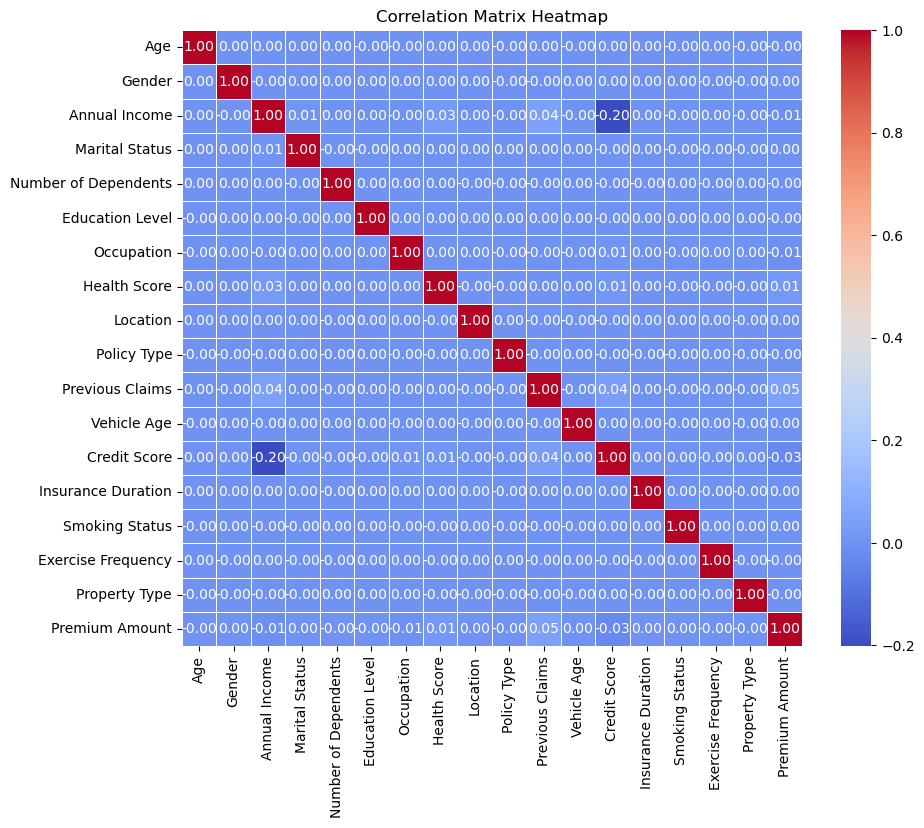

In [135]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# print(correlation_matrix)  # View the correlation values
# Plot the heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

### Display the shape of the data source after dropping columns

In [137]:
df.shape

(1048575, 18)

### Display the data types of the  data source

In [139]:
print(df.dtypes)

Age                     float64
Gender                    int32
Annual Income           float64
Marital Status            int32
Number of Dependents    float64
Education Level           int32
Occupation                int32
Health Score            float64
Location                  int32
Policy Type               int32
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Smoking Status            int32
Exercise Frequency        int32
Property Type             int32
Premium Amount            int64
dtype: object


### Diplay of columns with null values with the count

In [141]:
df.isna().sum().sort_values(ascending=False)

Previous Claims         317992
Credit Score            120411
Number of Dependents     95704
Health Score             64633
Annual Income            39209
Age                      16321
Vehicle Age                  5
Insurance Duration           1
Property Type                0
Exercise Frequency           0
Smoking Status               0
Policy Type                  0
Gender                       0
Location                     0
Occupation                   0
Education Level              0
Marital Status               0
Premium Amount               0
dtype: int64

### Analysis of Insurance Duration Column


In [143]:
df['Insurance Duration'].max(), df['Insurance Duration'].min()

(9.0, 1.0)

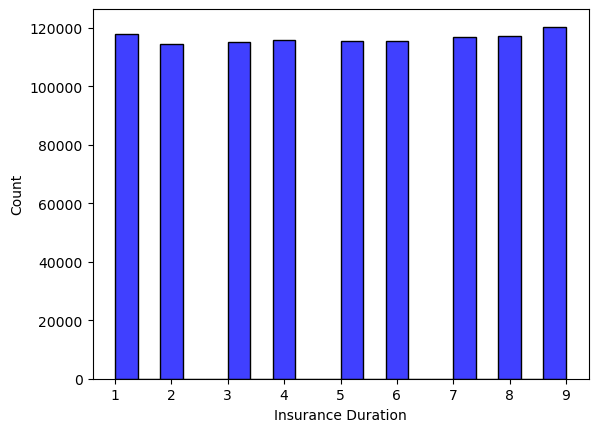

In [145]:
# Plot histogram for 'Insurance Duration' column
sns.histplot(df['Insurance Duration'], bins=20, kde=False, color='blue')

# Show the plot
plt.show()

### Fill NA for Insurance Duration

In [147]:
# Fill na using the mean of the Insurance Duration column
df['Insurance Duration']=df['Insurance Duration'].fillna(round(df['Insurance Duration'].mean()))
df.isna().sum().sort_values(ascending=False)

Previous Claims         317992
Credit Score            120411
Number of Dependents     95704
Health Score             64633
Annual Income            39209
Age                      16321
Vehicle Age                  5
Property Type                0
Exercise Frequency           0
Smoking Status               0
Insurance Duration           0
Policy Type                  0
Gender                       0
Location                     0
Occupation                   0
Education Level              0
Marital Status               0
Premium Amount               0
dtype: int64

### Analysis of Age Column

In [149]:
df['Age'].min(), df['Age'].max()

(18.0, 64.0)

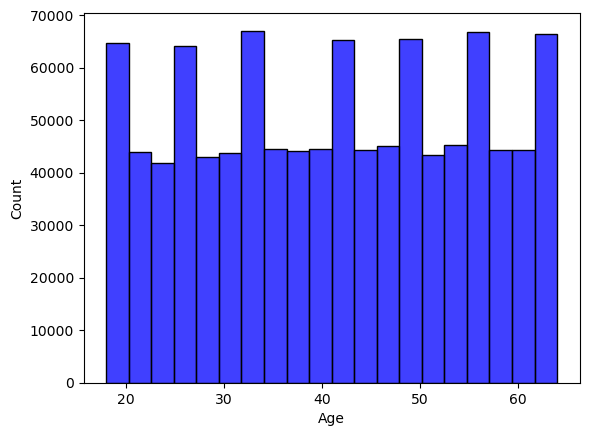

In [151]:
# Plot histogram for 'Age' column
sns.histplot(df['Age'], bins=20, kde=False, color='blue')

# Show the plot
plt.show()

### Fill NA for Age

In [153]:
# Fill NA using the group by of Occupation & Marital Status with its respective Mean values
df['Age'] = df['Age'].fillna(df.groupby(['Occupation', 'Marital Status'])['Age'].transform('median'))
df.isna().sum().sort_values(ascending=False)

Previous Claims         317992
Credit Score            120411
Number of Dependents     95704
Health Score             64633
Annual Income            39209
Vehicle Age                  5
Age                          0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Insurance Duration           0
Policy Type                  0
Gender                       0
Location                     0
Occupation                   0
Education Level              0
Marital Status               0
Premium Amount               0
dtype: int64

### Analysis of Vehicle Age Column

In [155]:
df['Vehicle Age'].min(), df['Vehicle Age'].max()

(0.0, 19.0)

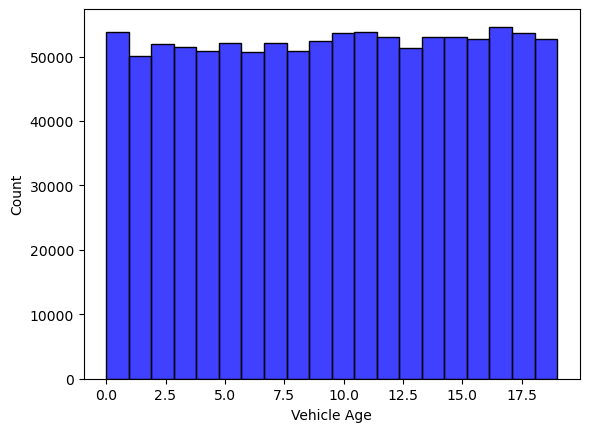

In [157]:
# Plot histogram for the 'Age' column
sns.histplot(df['Vehicle Age'], bins=20, kde=False, color='blue')

# Show the plot
plt.show()

### Fill NA for Vehicle Age

In [159]:
# Fill na using the mean of Vehicle Age
df['Vehicle Age']=df['Vehicle Age'].fillna(df.groupby(['Property Type'])['Vehicle Age'].transform('median'))
df.isna().sum().sort_values(ascending=False)

Previous Claims         317992
Credit Score            120411
Number of Dependents     95704
Health Score             64633
Annual Income            39209
Age                          0
Vehicle Age                  0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Insurance Duration           0
Policy Type                  0
Gender                       0
Location                     0
Occupation                   0
Education Level              0
Marital Status               0
Premium Amount               0
dtype: int64

### Analysis of Number of Dependents Column

In [161]:
df['Number of Dependents'].min(), df['Number of Dependents'].max()

(0.0, 4.0)

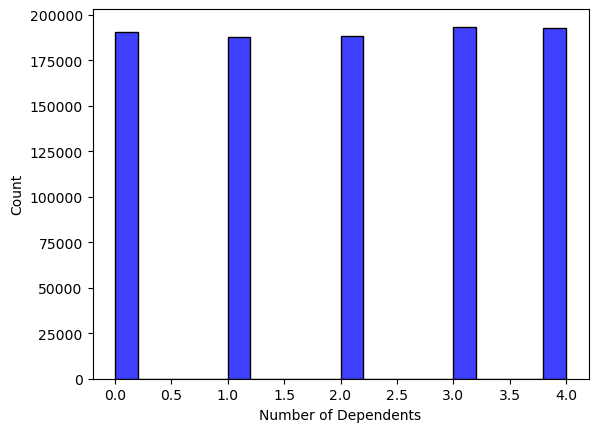

In [163]:
# Plot histogram for the 'Number of Dependents' column
sns.histplot(df['Number of Dependents'], bins=20, kde=False, color='blue')

# Show the plot
plt.show()

### Fill NA for Number of Dependents

In [165]:
# Fill na using the group by using Age, Gender, Marital Status using its respective median values
df['Number of Dependents'] = df['Number of Dependents'].fillna(df.groupby(['Age','Gender','Marital Status'])
                                                               ['Number of Dependents'].transform('median'))
df.isna().sum().sort_values(ascending=False)

Previous Claims         317992
Credit Score            120411
Health Score             64633
Annual Income            39209
Age                          0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Insurance Duration           0
Vehicle Age                  0
Policy Type                  0
Gender                       0
Location                     0
Occupation                   0
Education Level              0
Number of Dependents         0
Marital Status               0
Premium Amount               0
dtype: int64

### Analysis of Annual Income Column

In [167]:
df['Annual Income'].min(), df['Annual Income'].max()

(1.0, 149997.0)

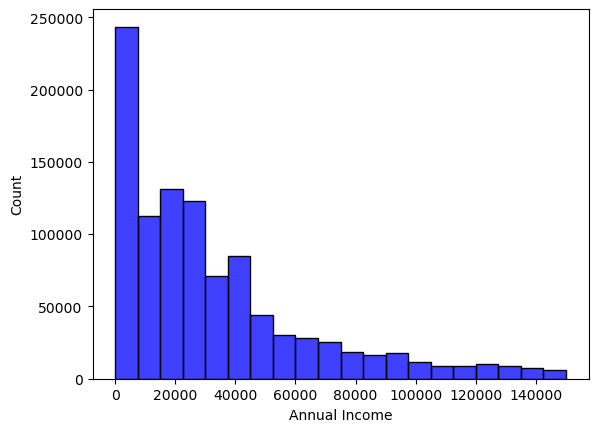

In [169]:
# Plot histogram 'Annual Income' column
sns.histplot(df['Annual Income'], bins=20, kde=False, color='blue')

# Show the plot
plt.show()

### Fill NA for Annual Income

In [171]:
# Fill NA for Annual Income column using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

train = df[df['Annual Income'].notnull()]
test = df[df['Annual Income'].isnull()]

X_train = train[['Location', 'Occupation', 'Education Level']]
y_train = train['Annual Income']

X_test = test[['Location', 'Occupation', 'Education Level']]

model = RandomForestRegressor()
model.fit(X_train, y_train)

df.loc[df['Annual Income'].isnull(), 'Annual Income'] = model.predict(X_test)
df.isna().sum().sort_values(ascending=False)

Previous Claims         317992
Credit Score            120411
Health Score             64633
Age                          0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Insurance Duration           0
Vehicle Age                  0
Policy Type                  0
Gender                       0
Location                     0
Occupation                   0
Education Level              0
Number of Dependents         0
Marital Status               0
Annual Income                0
Premium Amount               0
dtype: int64

### Analysis of Credit Score Column

In [173]:
df['Credit Score'].min(), df['Credit Score'].max()

(300.0, 849.0)

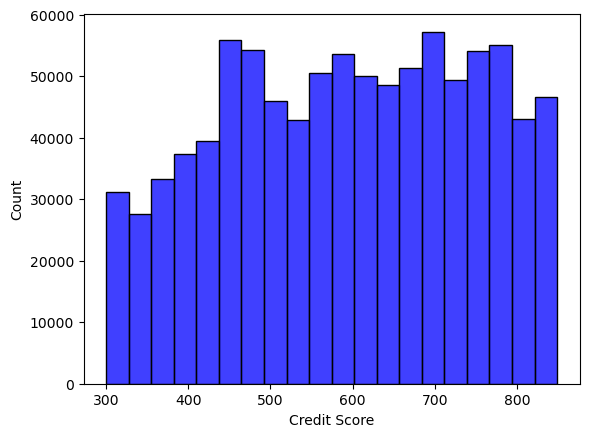

In [175]:
# Plot histogram for 'Credit Score' column
sns.histplot(df['Credit Score'], bins=20, kde=False, color='blue')

# Show the plot
plt.show()

### Fill NA for Credit Score

In [177]:
## Fill NA for Credit Score using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

train = df[df['Credit Score'].notnull()]
test = df[df['Credit Score'].isnull()]

X_train = train[['Annual Income', 'Occupation', 'Education Level']]
y_train = train['Credit Score']

X_test = test[['Annual Income', 'Occupation', 'Education Level']]

model = RandomForestRegressor()
model.fit(X_train, y_train)

df.loc[df['Credit Score'].isnull(), 'Credit Score'] = model.predict(X_test)
df.isna().sum().sort_values(ascending=False)

Previous Claims         317992
Health Score             64633
Age                          0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Insurance Duration           0
Credit Score                 0
Vehicle Age                  0
Policy Type                  0
Gender                       0
Location                     0
Occupation                   0
Education Level              0
Number of Dependents         0
Marital Status               0
Annual Income                0
Premium Amount               0
dtype: int64

### Fill NA for Previous Claims & Health Score(using MICE)

In [180]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Initialize IterativeImputer (MICE approach)
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
imputed_data = mice_imputer.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(imputed_data, columns=df.columns)
df.isna().sum().sort_values(ascending=False)

Age                     0
Gender                  0
Property Type           0
Exercise Frequency      0
Smoking Status          0
Insurance Duration      0
Credit Score            0
Vehicle Age             0
Previous Claims         0
Policy Type             0
Location                0
Health Score            0
Occupation              0
Education Level         0
Number of Dependents    0
Marital Status          0
Annual Income           0
Premium Amount          0
dtype: int64

In [182]:
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,0.0,10049.0,1.0,1.0,0.0,1.0,22.598761,2.0,2.0,2.000000,17.0,372.000000,5.0,0.0,3.0,2.0,2869.0
1,39.0,0.0,31678.0,0.0,3.0,2.0,3.0,15.569731,0.0,1.0,1.000000,12.0,694.000000,2.0,1.0,1.0,2.0,1483.0
2,23.0,1.0,25602.0,0.0,3.0,1.0,1.0,47.177549,1.0,2.0,1.000000,14.0,602.116902,3.0,1.0,3.0,2.0,567.0
3,21.0,1.0,141855.0,1.0,2.0,0.0,3.0,10.938144,0.0,0.0,1.000000,0.0,367.000000,1.0,1.0,0.0,0.0,765.0
4,21.0,1.0,39651.0,2.0,1.0,0.0,1.0,20.376094,0.0,2.0,0.000000,8.0,598.000000,4.0,1.0,3.0,2.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,18.0,1.0,39766.0,0.0,0.0,3.0,3.0,16.939866,0.0,0.0,1.031215,11.0,739.000000,9.0,1.0,1.0,2.0,684.0
1048571,62.0,0.0,44715.0,1.0,2.0,3.0,0.0,19.835005,0.0,0.0,1.128568,19.0,775.000000,3.0,0.0,3.0,2.0,2143.0
1048572,63.0,0.0,11928.0,2.0,4.0,0.0,1.0,25.788763,1.0,2.0,1.000000,18.0,657.000000,7.0,1.0,3.0,0.0,1805.0
1048573,24.0,1.0,80123.0,0.0,2.0,1.0,3.0,38.638404,2.0,0.0,0.000000,5.0,704.000000,6.0,1.0,2.0,2.0,2160.0


### Correlation matrix heatmap

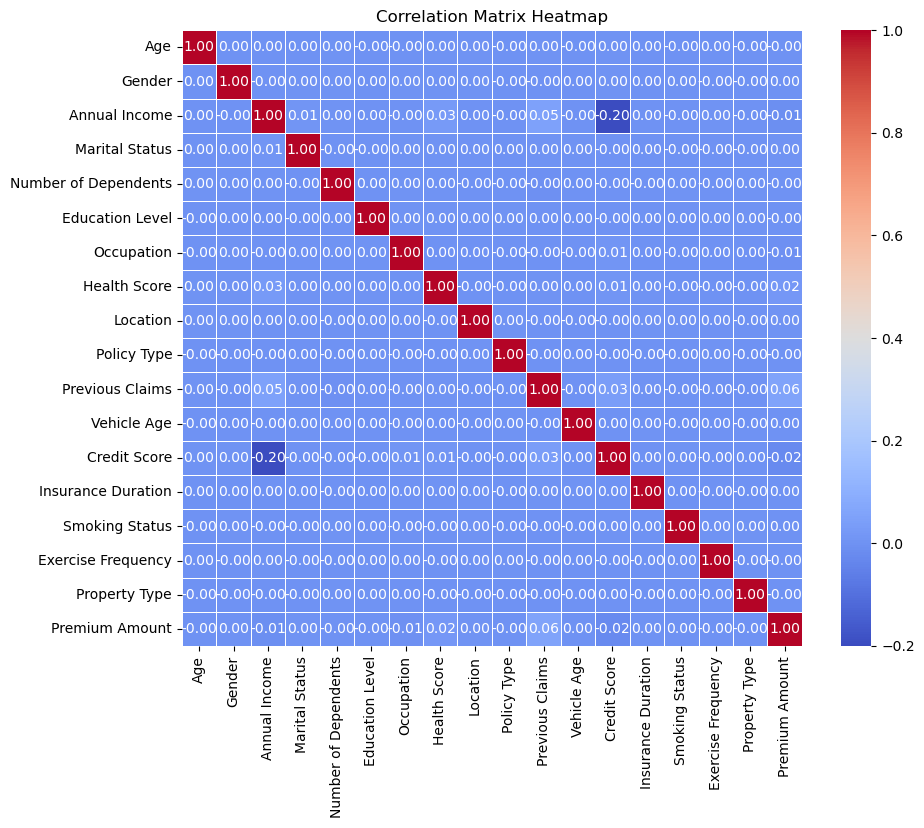

In [184]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# print(correlation_matrix)  # View the correlation values
# Plot the heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [186]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Premium Amount'],
      dtype='object')

In [188]:
correlation = numeric_features.corr()
print(correlation['Premium Amount'].sort_values(ascending=False))

Premium Amount          1.000000
Previous Claims         0.055307
Health Score            0.015283
Marital Status          0.004931
Location                0.001492
Gender                  0.000488
Vehicle Age             0.000154
Insurance Duration      0.000141
Smoking Status          0.000131
Number of Dependents   -0.000302
Policy Type            -0.000462
Exercise Frequency     -0.000668
Education Level        -0.000693
Property Type          -0.000781
Age                    -0.002255
Occupation             -0.006067
Annual Income          -0.011595
Credit Score           -0.023822
Name: Premium Amount, dtype: float64


<Axes: title={'center': 'Correlation of numeric features with Premium Amount'}>

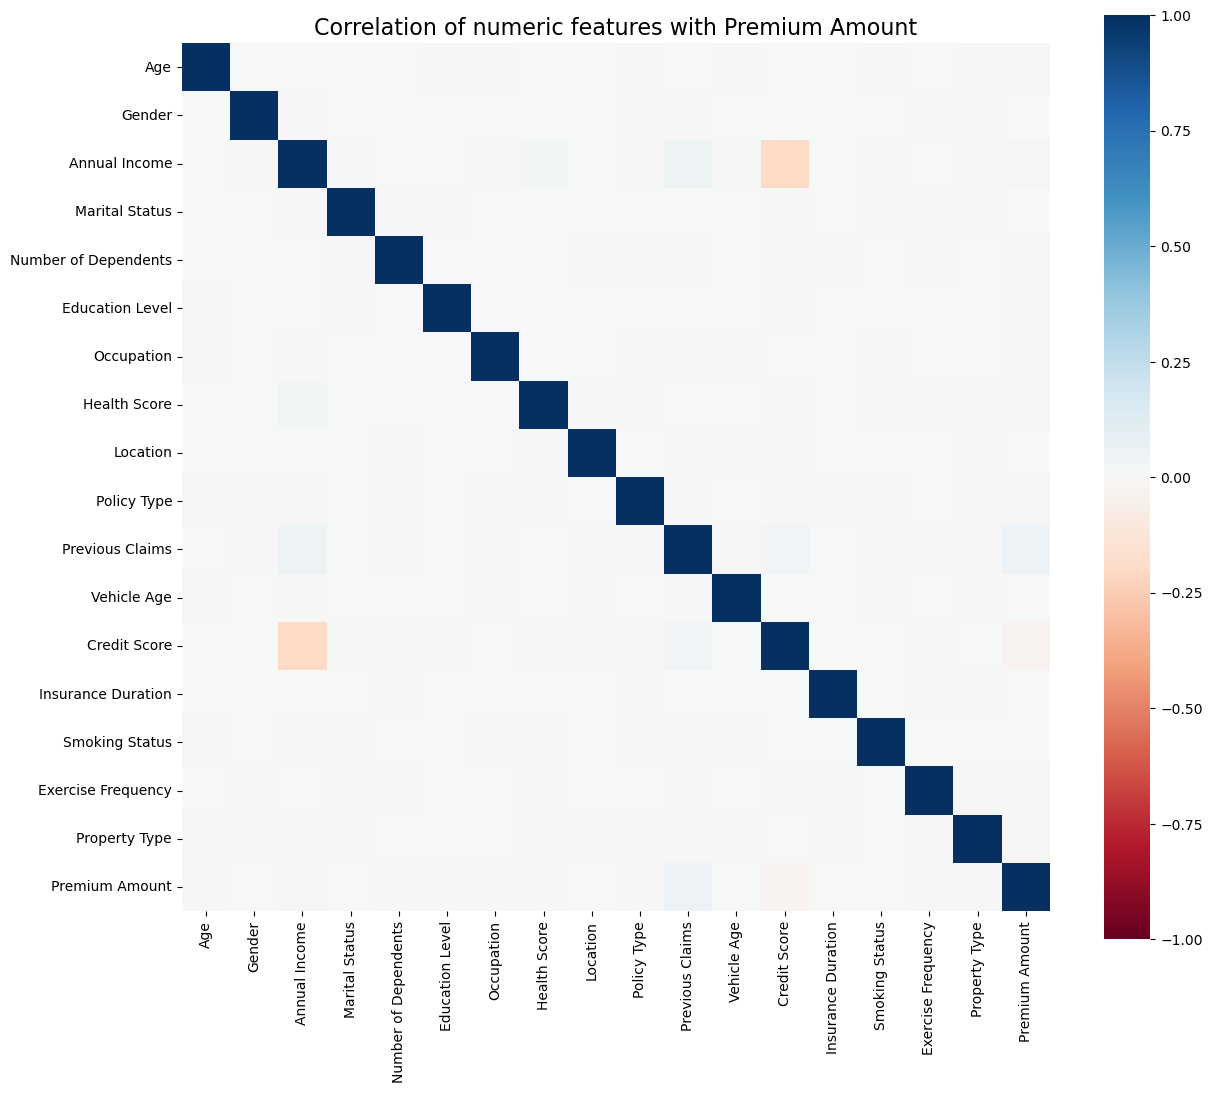

In [190]:
import matplotlib.pyplot as plot
import seaborn as sns
f, ax = plot.subplots(figsize=(14,12))
plot.title('Correlation of numeric features with Premium Amount',y=1, size=16)
sns.heatmap(correlation, square=True, vmin=-1, vmax=1, center=0, cmap='RdBu', annot=False)

### Defining X & y

In [192]:
X = df.drop(['Premium Amount'], axis=1)
y = df['Premium Amount']

### Splitting Train & Test data

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Models

In [196]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [
    (
        "XGBRegressor",
        {"n_estimators":100, "learning_rate":0.1},
        XGBRegressor(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "DecisionTreeRegressor",
        {"random_state":100},
        DecisionTreeRegressor(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "RandomForest",
        {"n_estimators":10, "random_state":42},
        RandomForestRegressor(),
        (X_train, y_train),
        (X_test, y_test)
    )    
]

### Iterating the models to spot the best

In [198]:
import numpy as np
from sklearn.metrics import mean_squared_log_error
import mlflow.xgboost
from xgboost import XGBRegressor
import pickle

reports = []
best_r2 = float('-inf')

for model_name, params, model, train_set, test_set in models:
    X_train = train_set[0]
    y_train = train_set[1]
    X_test  = test_set[0]
    y_test = test_set[1]

    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.maximum(0, y_pred) # to clip the negative values
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmsle =  np.sqrt(mean_squared_log_error(y_test, y_pred))

    reports.append((model_name, rmse,mae,r2,rmsle))
    if r2 > best_r2:
        best_r2 = r2
        best_model = model

print('The best model is ', best_model)
print('The r2 score is ', best_r2)
with open("best_model.pkl", 'wb') as file:
    pickle.dump(best_model,file)
    
#print(reports)
#val = model.predict([[30,1,50000,1,2,0,0,86,0,1,2,8,705,23,0,2,1]])
#print('Predicted value is: ', val)

# Print header and values after the loop
print(f"{'Model Name':<20} {'RMSE':<15} {'MAE':<15} {'R2 Score':<15} {'RMSLE':<15}")
print("-" * 100)
for report in reports:
    print(f"{report[0]:<25} {report[1]:<15.4f} {report[2]:<15.4f} {report[3]:<15.4f} {report[4]:<15.4f}")

The best model is  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)
The r2 score is  0.3101966488296186
Model Name           RMSE            MAE             R2 Score        RMSLE          
----------------------------------------------------------------------------------------------------
XGBRegresso

#### Launch the ML flow ui using "mlflow ui" command in command prompt

### Logging the models in ML Flow UI

In [205]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost

# Initialize MLflow
mlflow.set_experiment("Smart Premium Predictor")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

for i, element in enumerate(models):
    model_name = element[0]
    params = element[1]
    model = element[2]
    report = reports[i]
    
    with mlflow.start_run(run_name=model_name):        
        mlflow.log_params(params)
        mlflow.log_metrics({
            'RMSE':report[1],
            'MAE':report[2],
            'r2':report[3],
            'rmsle':report[4]})

        if "XGB" in model_name:
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")  

2025/04/10 15:05:25 INFO mlflow.tracking.fluent: Experiment with name 'Smart Premium Predictor' does not exist. Creating a new experiment.
2025/04/10 15:05:26 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
  

🏃 View run XGBRegressor at: http://127.0.0.1:5000/#/experiments/819442852643574682/runs/251779c6198443fab70a655fe0b5272f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/819442852643574682


2025/04/10 15:05:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTreeRegressor at: http://127.0.0.1:5000/#/experiments/819442852643574682/runs/6e96dc6e5763460abcc314b88485f1cd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/819442852643574682


2025/04/10 15:06:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/819442852643574682/runs/e31a72e6810c4d7ba0c9ee6df27709db
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/819442852643574682


# Register the model

In [ ]:
model_name = 'XGBRegressorModel'
run_id=input('Please type RunID')
model_uri = f'runs:/{run_id}/model'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)

## Load & test the challenger model from local fetching from MLflow

In [ ]:
model_version = 1

model_uri = f"models:/{model_name}@challenger"
print(model_uri)

loaded_model = mlflow.xgboost.load_model(model_uri)
y_pred = loaded_model.predict(X_test)
print(y_pred)

# Deploying the challenger model to prod

In [ ]:
dev_model_uri=f"models:/{model_name}@challenger"
prod_model = 'MyProdModel'

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=dev_model_uri, dst_name=prod_model)

# Load & test the champion model from local fetching from MLflow¶

In [ ]:
model_uri = f"models:/{prod_model}@champion"
print(model_uri)
loaded_model = mlflow.xgboost.load_model(model_uri)
y_pred = loaded_model.predict(X_test)
y_pred
val = model.predict([[30,1,50000,1,2,0,0,86,0,1,2,8,705,23,0,2,1]])
print(val)

In [ ]:
!export 

In [ ]:
!mlflow models serve --model-uri models:/MyProdModel2@champion -p 7770 --no-conda